#   Name: Iqra Iqbal

# Roll_No: BSMath2020_15

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.shape

(2016, 8)

In [4]:
test_data = pd.read_csv('test.csv')

In [5]:
test_data.shape

(505, 8)

In [6]:
#read trainig and testing data, show sample from both dataset

train_data = pd.read_csv('train.csv')

print("Training Dataset Sample:")
print(train_data)
train_data.describe()

print(" ")

test_data = pd.read_csv('test.csv')
print("\nTesting Dataset Sample:")
print(test_data)

Training Dataset Sample:
      beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0        3    2.5  2590.0       sqft   6000.00           sqft     98144   
1        4    2.0  2240.0       sqft      0.31           acre     98106   
2        4    3.0  2040.0       sqft   3783.00           sqft     98107   
3        4    3.0  3800.0       sqft   5175.00           sqft     98199   
4        2    2.0  1042.0       sqft       NaN            NaN     98102   
...    ...    ...     ...        ...       ...            ...       ...   
2011     3    2.0  1370.0       sqft      0.50           acre     98112   
2012     1    1.0   889.0       sqft       NaN            NaN     98121   
2013     4    2.0  2140.0       sqft   6250.00           sqft     98199   
2014     2    2.0   795.0       sqft       NaN            NaN     98103   
2015     3    2.0  1710.0       sqft   4267.00           sqft     98133   

          price  
0      795000.0  
1      915000.0  
2      950000.0  
3 

****

# Task 1: Date Preprocessing

**Preprocessing**

**Explore and Understand the Dataset**

In [7]:
#we use shape()to obtain the dimensions (number of rows and columns) of a DataFrame.
print(train_data.shape)
print(test_data.shape)

(2016, 8)
(505, 8)


In [8]:
#info provide a information about  the data types of each column, the number of non-null values, and memory usage.
train_data.info()
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   l

In [9]:
#The describe() method in Pandas generates statistical summary metrics for numerical data,
#including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.
#This helps in understanding the data's central tendency and variability.
train_data.describe()
test_data.describe()

,beds,baths,size,lot_size,zip_code,price
count,505.000000,505.000000,505.000000,428.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,3994.459813,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,2696.962024,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,0.230000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,1326.500000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,4190.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,6000.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,9974.000000,98199.000000,6.250000e+06


In [10]:
# returns the number of null values in all columns of DataFrame
print(train_data.isna().sum())
print(test_data.isna().sum())

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64
beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64


In [11]:
# Replace empty values and null values in "lot_size" with the mean value
mean_lot_size = train_data["lot_size"].mean()
train_data["lot_size"] = train_data["lot_size"].fillna(mean_lot_size)
# Replace empty values and null values in "lot_size" with the mean value
mean_lot_size = test_data["lot_size"].mean()
test_data["lot_size"] = test_data["lot_size"].fillna(mean_lot_size)

In [12]:
# replace NaN values from lot_size_units with its mode from Trian file
mode_term = train_data["lot_size_units"].mode()[0]
train_data["lot_size_units"].fillna(mode_term, inplace=True)
# replace NaN values from lot_size_units with its mode from test file
mode_term = test_data["lot_size_units"].mode()[0]
test_data["lot_size_units"].fillna(mode_term, inplace=True)

In [13]:
print(train_data.isna().sum())
print(test_data.isna().sum())

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64
beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64


In [14]:
#The duplicated() method checks for duplicate rows in the DataFrame and marks the duplicates as True and the non-duplicates as False.
# Prints the duplicated rows
duplicates = train_data.duplicated()
print(duplicates)  
duplicated_rows = train_data[duplicates]
print(duplicated_rows)  
#for test file
duplicates = test_data.duplicated()
print(duplicates)  
duplicated_rows =test_data[duplicates]
print(duplicated_rows)  


0       False
1       False
2       False
3       False
4       False
        ...  
2011    False
2012    False
2013    False
2014    False
2015    False
Length: 2016, dtype: bool
      beds  baths    size size_units  lot_size lot_size_units  zip_code  \
653      3    2.5  1810.0       sqft   1436.00           sqft     98107   
809      1    1.0   376.0       sqft      0.23           acre     98199   
839      2    2.0  1020.0       sqft    776.00           sqft     98118   
1146     3    3.0  1880.0       sqft   2200.00           sqft     98107   
1400     2    2.0  1170.0       sqft    588.00           sqft     98144   
1402     1    1.0   376.0       sqft      0.23           acre     98199   
1487     2    2.0  1200.0       sqft   1247.00           sqft     98122   
1520     1    1.0   376.0       sqft      0.23           acre     98199   
1819     2    2.0  1332.0       sqft   1101.00           sqft     98199   

          price  
653   1000000.0  
809   1000000.0  
839    605000.0

In [15]:
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

In [16]:
train_data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.000000,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.310000,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.000000,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.000000,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,3871.059694,sqft,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.500000,acre,98112,910000.0
2012,1,1.0,889.0,sqft,3871.059694,sqft,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.000000,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,3871.059694,sqft,98103,590000.0


In [17]:
test_data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [18]:
# Concatenate the train and test DataFrames
merged_data = pd.concat([train_data, test_data], ignore_index=True)
print(merged_data)

      beds  baths    size size_units     lot_size lot_size_units  zip_code  \
0        3    2.5  2590.0       sqft  6000.000000           sqft     98144   
1        4    2.0  2240.0       sqft     0.310000           acre     98106   
2        4    3.0  2040.0       sqft  3783.000000           sqft     98107   
3        4    3.0  3800.0       sqft  5175.000000           sqft     98199   
4        2    2.0  1042.0       sqft  3871.059694           sqft     98102   
...    ...    ...     ...        ...          ...            ...       ...   
2506     5    4.5  5580.0       sqft     0.300000           acre     98146   
2507     3    2.5  1390.0       sqft  1570.000000           sqft     98126   
2508     3    2.5  2950.0       sqft     0.470000           acre     98118   
2509     5    5.0  3010.0       sqft  4887.000000           sqft     98115   
2510     3    2.0  1301.0       sqft  3000.000000           sqft     98103   

          price  
0      795000.0  
1      915000.0  
2      95

In [19]:
#convert the lot_size_unit into one unit
def convert_lot_size_units(x):
    if x == 'sqft':
        return 1.0
    elif x == 'acre':
        return 43560.0  # 1 acre = 43,560 square feet
    else:
        return float('nan')

merged_data['lot_size_units'] = merged_data['lot_size_units'].map(convert_lot_size_units)

In [20]:
def convert_size_units(x):
    if x == 'sqft':
        return 1.0
    elif x == 'acre':
        return 43560.0  # 1 acre = 43,560 square feet
    else:
        return float('nan')
merged_data['size_units'] = merged_data['size_units'].map(convert_size_units)

In [21]:
merged_data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,1.0,6000.000000,1.0,98144,795000.0
1,4,2.0,2240.0,1.0,0.310000,43560.0,98106,915000.0
2,4,3.0,2040.0,1.0,3783.000000,1.0,98107,950000.0
3,4,3.0,3800.0,1.0,5175.000000,1.0,98199,1950000.0
4,2,2.0,1042.0,1.0,3871.059694,1.0,98102,950000.0
...,...,...,...,...,...,...,...,...
2506,5,4.5,5580.0,1.0,0.300000,43560.0,98146,3800000.0
2507,3,2.5,1390.0,1.0,1570.000000,1.0,98126,575000.0
2508,3,2.5,2950.0,1.0,0.470000,43560.0,98118,3105000.0
2509,5,5.0,3010.0,1.0,4887.000000,1.0,98115,1807000.0


In [22]:
merged_data["baths"].unique()

array([2.5, 2. , 3. , 1. , 3.5, 1.5, 5.5, 5. , 4. , 8.5, 4.5, 6. , 0.5,
       7. , 9. , 6.5])

In [23]:
# Here bath value is in decimel so this is mistake so thas why i convert them into integer
merged_data['baths'] = np.ceil(merged_data['baths'])
print(merged_data.head())

   beds  baths    size  size_units     lot_size  lot_size_units  zip_code  \
0     3    3.0  2590.0         1.0  6000.000000             1.0     98144   
1     4    2.0  2240.0         1.0     0.310000         43560.0     98106   
2     4    3.0  2040.0         1.0  3783.000000             1.0     98107   
3     4    3.0  3800.0         1.0  5175.000000             1.0     98199   
4     2    2.0  1042.0         1.0  3871.059694             1.0     98102   

       price  
0   795000.0  
1   915000.0  
2   950000.0  
3  1950000.0  
4   950000.0  


In [24]:
merged_data["baths"].unique()

array([3., 2., 1., 4., 6., 5., 9., 7.])

In [25]:
#here i am changing the date type of "bath" column float to integer
merged_data['baths'] = merged_data['baths'].astype(int)
merged_data.dtypes

beds                int64
baths               int32
size              float64
size_units        float64
lot_size          float64
lot_size_units    float64
zip_code            int64
price             float64
dtype: object

In [26]:
merged_data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3,2590.0,1.0,6000.000000,1.0,98144,795000.0
1,4,2,2240.0,1.0,0.310000,43560.0,98106,915000.0
2,4,3,2040.0,1.0,3783.000000,1.0,98107,950000.0
3,4,3,3800.0,1.0,5175.000000,1.0,98199,1950000.0
4,2,2,1042.0,1.0,3871.059694,1.0,98102,950000.0
...,...,...,...,...,...,...,...,...
2506,5,5,5580.0,1.0,0.300000,43560.0,98146,3800000.0
2507,3,3,1390.0,1.0,1570.000000,1.0,98126,575000.0
2508,3,3,2950.0,1.0,0.470000,43560.0,98118,3105000.0
2509,5,5,3010.0,1.0,4887.000000,1.0,98115,1807000.0


 **Handle Outliers**

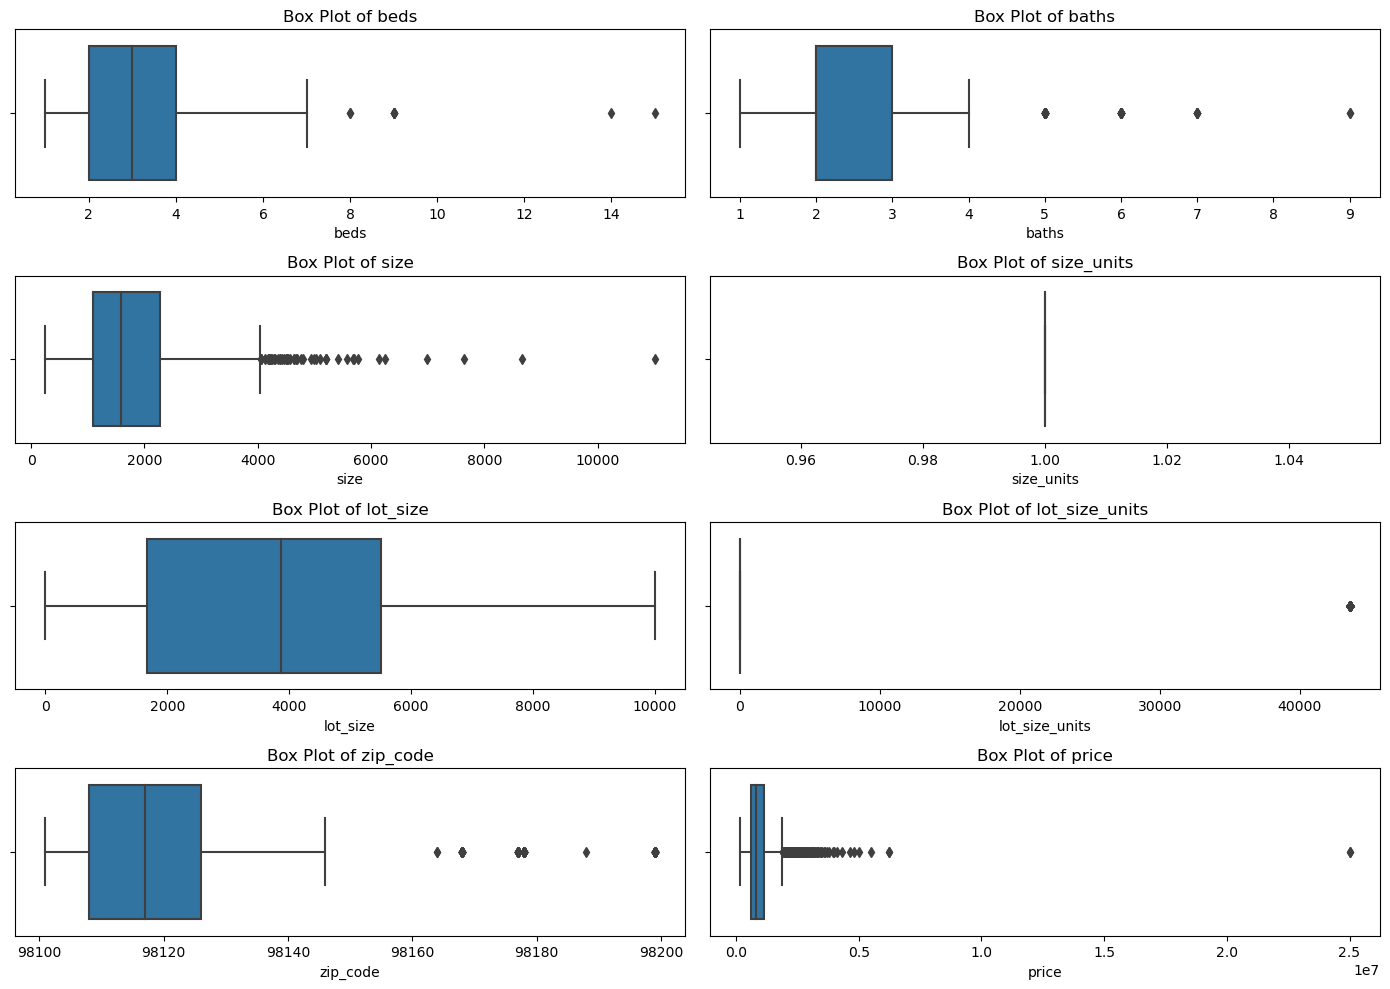

In [27]:
columns_to_plot = ['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units', 'zip_code', 'price']
plt.figure(figsize=(14, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=merged_data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [28]:
def cap_outliers_to_upper_limit(merged_data, columns_to_cap):
    for column_name in columns_to_cap:
        q3 = merged_data[column_name].quantile(0.75)
        q1 = merged_data[column_name].quantile(0.25)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        merged_data[column_name] = merged_data[column_name].apply(lambda x: upper_limit if x > upper_limit else x)
        merged_data[column_name] = merged_data[column_name].apply(lambda x: lower_limit if x < lower_limit else x)
    return merged_data

In [29]:
merged_data = cap_outliers_to_upper_limit(merged_data, ['beds', 'baths', 'size','zip_code', 'price'])

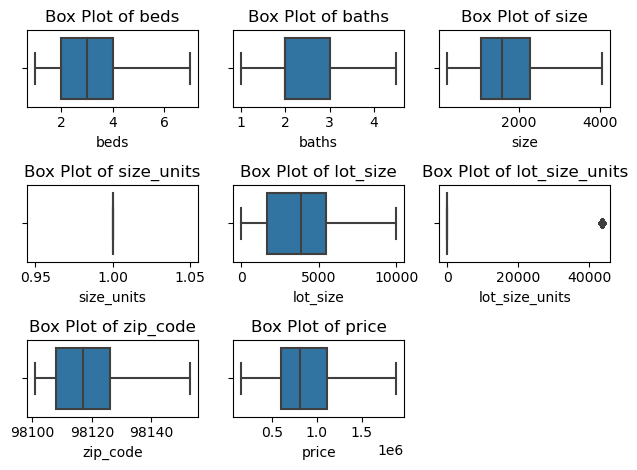

In [30]:
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=merged_data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [31]:
def find_correlation(merged_data):
    correlations = {}
    cols = merged_data.columns.tolist()
    cols.remove("price")
    for col in cols:
        corr = merged_data[col].corr(merged_data['price'])
        correlations[col] = corr
    return correlations

corr = find_correlation(merged_data)

# Print correlations vertically
for key, value in corr.items():
    print(f"{key}: {value}")

beds: 0.5849182109908231
baths: 0.6310848952216949
size: 0.780729691032401
size_units: nan
lot_size: 0.16188934698554866
lot_size_units: -0.07562155610341166
zip_code: -0.06569412954664662


In [32]:
merged_data.drop(['size_units', 'lot_size_units'], axis=1, inplace=True)

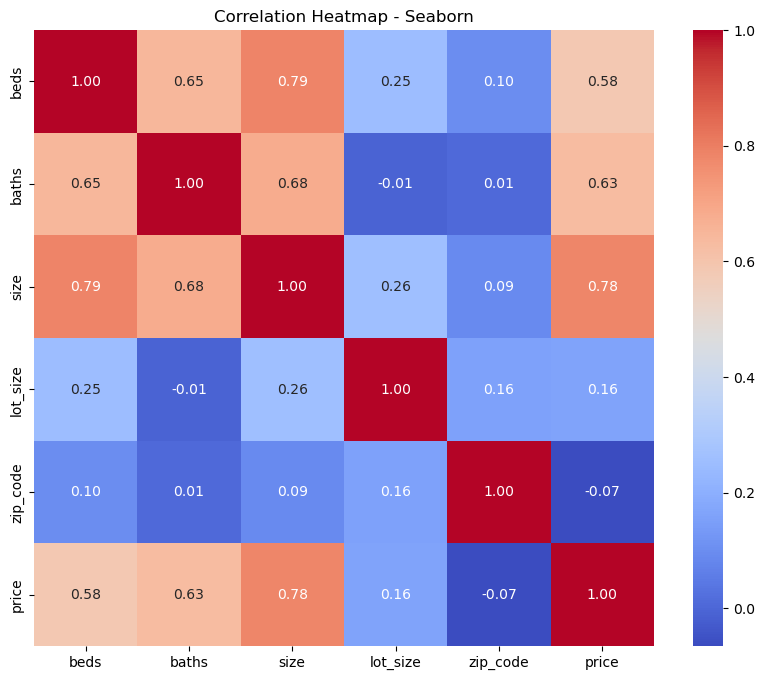

In [33]:
correlation = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Seaborn")
plt.show()

In [34]:
# zscore normalization
def zscore_norm(col):
  mean_col = np.mean(col)
  std_col = np.std(col)
  col_new = (col - mean_col) / std_col
  return col_new

In [35]:
merged_data["beds"] = zscore_norm(merged_data["beds"])
merged_data["baths"] = zscore_norm(merged_data["baths"])
merged_data["size"] = zscore_norm(merged_data["size"])
merged_data["lot_size"] = zscore_norm(merged_data["lot_size"])
merged_data["price"] = zscore_norm(merged_data["price"])

# **Task 2: Regresion**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [37]:
# Separate the merged data back into train and test
train_data = merged_data.iloc[:2007, :]
test_data = merged_data.iloc[2007:, :]

In [38]:
print(test_data.shape)

(504, 6)


In [39]:
# Select features (X) and target variable (y) for training
X_train = train_data.iloc[:2007, :-1]  # Assuming the last column is the target variable
y_train = train_data['price']

In [40]:
X_test = test_data.iloc[:2007, :-1]
y_test = test_data['price']  # Assuming the last column is 'price'

In [41]:
X_train.shape

(2007, 5)

In [42]:
X_test.shape

(504, 5)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
print('Intercept:', model.intercept_)

Intercept: 884.6690820996035


In [47]:
print(model.coef_)

[-0.12974263  0.19704796  0.75750822  0.02897112 -0.00901604]


In [48]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.3947257376091828
R-squared Score: 0.6245164149246867


**Regression by split of 20%**

In [49]:
input_data = merged_data.iloc[:, 0:-1]
output_labels = merged_data['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_labels, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.30749822805314075
R-squared Score: 0.6813536457598603


**Regression by split 30%**

In [55]:
input_data = merged_data.iloc[:, 0:-1]
output_labels = merged_data['price']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_labels, test_size=0.3, random_state=42)

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.31044517976695596
R-squared Score: 0.6861835310522031


# **Task 3: Classification**

In [61]:
min_value = merged_data['price'].min()
max_value = merged_data['price'].max()
print(min_value)
print(max_value)

-1.7642704633965347
2.312911535068303


**Adding a new column 'price_category' based on price values for applying calssifiaction**

In [62]:
price_bins = pd.qcut(merged_data['price'], q=3, labels=[ 'Low', 'Medium', 'High'])
merged_data['price_category'] = price_bins

In [63]:
merged_data

,beds,baths,size,lot_size,zip_code,price,price_category
0,0.109890,0.691501,1.003329,0.846202,98144.0,-0.261902,Medium
1,0.953723,-0.298441,0.588629,-1.581064,98106.0,0.021564,Medium
2,0.953723,0.691501,0.351658,-0.050719,98107.0,0.104241,Medium
3,0.953723,0.691501,2.437005,0.512436,98153.0,2.312912,High
4,-0.733943,-0.298441,-0.830829,-0.015093,98102.0,0.104241,Medium
...,...,...,...,...,...,...,...
2506,1.797556,2.176413,2.732330,-1.581068,98146.0,2.312912,High
2507,0.109890,0.691501,-0.418499,-0.946022,98126.0,-0.781589,Low
2508,0.109890,0.691501,1.429877,-1.581000,98118.0,2.312912,High
2509,1.797556,2.176413,1.500969,0.395921,98115.0,2.128659,High


In [64]:
#preprocessing
#Convert categorical values into integers in the "price_category" column
merged_data["price_category"] = merged_data["price_category"].replace([ "Low", "Medium", "High"], [1,2,3])

In [65]:
merged_data

,beds,baths,size,lot_size,zip_code,price,price_category
0,0.109890,0.691501,1.003329,0.846202,98144.0,-0.261902,2
1,0.953723,-0.298441,0.588629,-1.581064,98106.0,0.021564,2
2,0.953723,0.691501,0.351658,-0.050719,98107.0,0.104241,2
3,0.953723,0.691501,2.437005,0.512436,98153.0,2.312912,3
4,-0.733943,-0.298441,-0.830829,-0.015093,98102.0,0.104241,2
...,...,...,...,...,...,...,...
2506,1.797556,2.176413,2.732330,-1.581068,98146.0,2.312912,3
2507,0.109890,0.691501,-0.418499,-0.946022,98126.0,-0.781589,1
2508,0.109890,0.691501,1.429877,-1.581000,98118.0,2.312912,3
2509,1.797556,2.176413,1.500969,0.395921,98115.0,2.128659,3


In [66]:
def find_correlation(merged_data):
    correlations = {}
    cols = merged_data.columns.tolist()
    cols.remove('price_category')
    for col in cols:
        corr = merged_data[col].corr(merged_data['price_category'])
        correlations[col] = corr
    return correlations

corr = find_correlation(merged_data)

# Print correlations vertically
for key, value in corr.items():
    print(f"{key}: {value}")

beds: 0.5630114884890847
baths: 0.5808082316878345
size: 0.6931698130181834
lot_size: 0.12964819157539578
zip_code: -0.09411530217045704
price: 0.8656052300628098


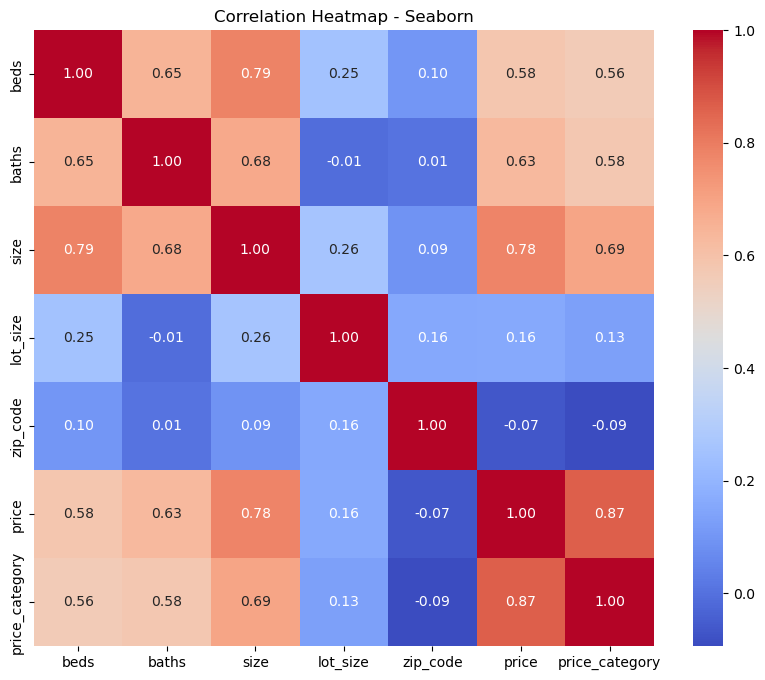

In [67]:
correlation = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Seaborn")
plt.show()

**Check whether data is balance or not**

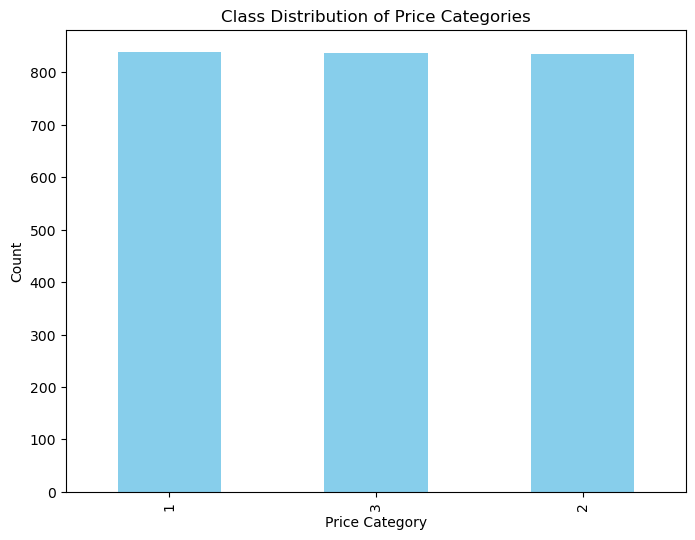

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
merged_data['price_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

In [69]:
print(merged_data.isna().sum())

beds              0
baths             0
size              0
lot_size          0
zip_code          0
price             0
price_category    0
dtype: int64


In [70]:
#remove the price column beacuse new column are made based on the price
merged_data.drop(['price'], axis=1, inplace=True)

# **Models**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import svm

# **KNN**

In [72]:
# Separate the merged data back into train and test
train_data = merged_data.iloc[:2007, :]
test_data = merged_data.iloc[2007:, :]

In [73]:
X_train = train_data.iloc[:2007, :-1]
y_train = train_data['price_category']

In [74]:
X_test = test_data.iloc[:2007, :-1]
y_test = test_data['price_category']

In [75]:
knn = KNeighborsClassifier(n_neighbors =9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [76]:
y_pred = knn.predict(X_test)

In [77]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.7142857142857143

In [78]:
cr_nb = classification_report(y_test, y_pred)
print(cr_nb)

              precision    recall  f1-score   support

           1       0.76      0.80      0.78       159
           2       0.59      0.57      0.58       157
           3       0.78      0.77      0.77       188

    accuracy                           0.71       504
   macro avg       0.71      0.71      0.71       504
weighted avg       0.71      0.71      0.71       504



In [79]:
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Create a table to display the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Accuracy', 'F1 Score', 'Recall'],
    'Value': [precision, accuracy, f1, recall]
})

# Display the metrics table
print(metrics_table)

      Metric     Value
0  Precision  0.712436
1   Accuracy  0.714286
2   F1 Score  0.713088
3     Recall  0.714286


<Axes: >

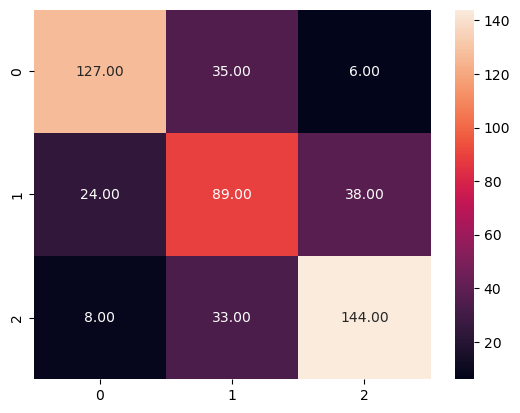

In [80]:
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True, fmt='.2f')

# **Nave_Bayes**

In [81]:
X_train = train_data.iloc[:2007, :-1]
y_train = train_data['price_category']

In [82]:
X_test = test_data.iloc[:2007, :-1]
y_test = test_data['price_category']

In [83]:
naive_bayes_model = GaussianNB()

In [84]:
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [85]:
y_pred = naive_bayes_model.predict(X_test)

In [86]:
y_pred.shape

(504,)

In [87]:
nv_accuracy = accuracy_score(y_test, y_pred)
nv_accuracy

0.6349206349206349

In [88]:
cr_nb = classification_report(y_test, y_pred)
print(cr_nb)

              precision    recall  f1-score   support

           1       0.66      0.70      0.68       159
           2       0.47      0.48      0.48       157
           3       0.76      0.70      0.73       188

    accuracy                           0.63       504
   macro avg       0.63      0.63      0.63       504
weighted avg       0.64      0.63      0.64       504



In [89]:
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Create a table to display the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Accuracy', 'F1 Score', 'Recall'],
    'Value': [precision, accuracy, f1, recall]
})

# Display the metrics table
print(metrics_table)

      Metric     Value
0  Precision  0.639098
1   Accuracy  0.634921
2   F1 Score  0.636378
3     Recall  0.634921


<Axes: >

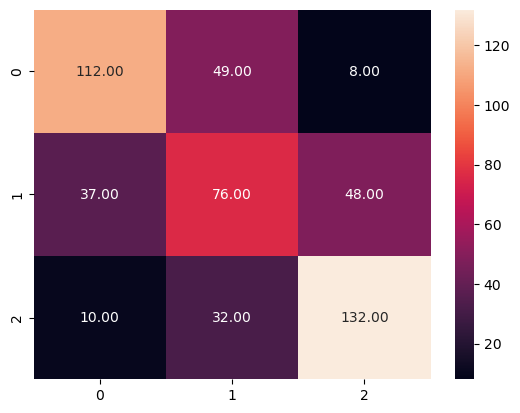

In [90]:
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True, fmt='.2f')

# **Decision Tree**

In [91]:
X_train = train_data.iloc[:2007, :-1]
y_train = train_data['price_category']

In [92]:
X_test = test_data.iloc[:2007, :-1]
y_test = test_data['price_category']

In [93]:
decision_tree_model=DecisionTreeClassifier()

In [94]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
y_pred = decision_tree_model.predict(X_test)

In [96]:
cr_dest = classification_report(y_test, y_pred)
print(cr_dest)

              precision    recall  f1-score   support

           1       0.74      0.67      0.70       159
           2       0.56      0.61      0.58       157
           3       0.74      0.74      0.74       188

    accuracy                           0.68       504
   macro avg       0.68      0.67      0.67       504
weighted avg       0.68      0.68      0.68       504



In [97]:
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Create a table to display the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Accuracy', 'F1 Score', 'Recall'],
    'Value': [precision, accuracy, f1, recall]
})

# Display the metrics table
print(metrics_table)

      Metric     Value
0  Precision  0.682049
1   Accuracy  0.676587
2   F1 Score  0.678314
3     Recall  0.676587


<Axes: >

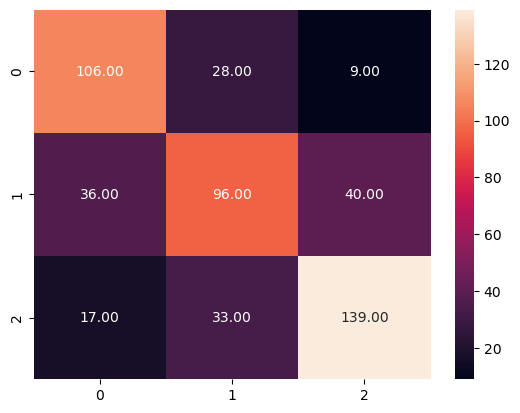

In [98]:
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True, fmt='.2f')

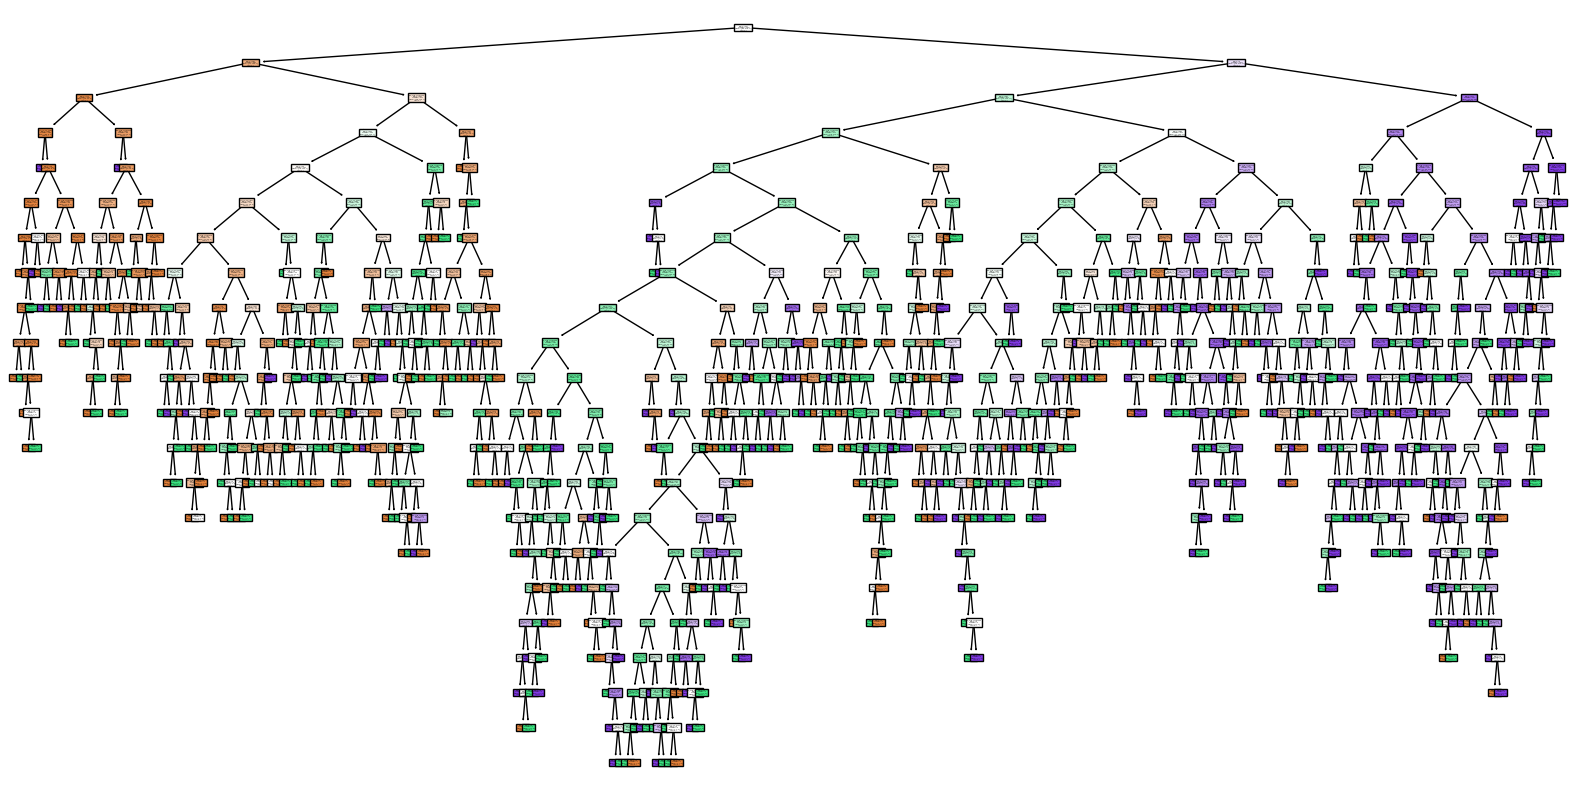

In [99]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=list(X_train.columns), class_names=list(map(str, decision_tree_model.classes_)))
plt.show()

# **Random Forest on Test file**

In [100]:
# Select features (X) and target variable (y) for training
X_train = train_data.iloc[:2007, :-1]  # Assuming the last column is the target variable
y_train = train_data['price_category']

In [101]:
X_test = test_data.iloc[:2007, :-1]
y_test = test_data['price_category']  # Removed the dot after test_data

In [102]:
random_forest_model = RandomForestClassifier()

In [103]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
y_pred = random_forest_model.predict(X_test)

In [105]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.7222222222222222

In [106]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.75      0.78       159
           2       0.60      0.62      0.61       157
           3       0.76      0.78      0.77       188

    accuracy                           0.72       504
   macro avg       0.72      0.72      0.72       504
weighted avg       0.73      0.72      0.72       504



In [107]:
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Create a table to display the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Accuracy', 'F1 Score', 'Recall'],
    'Value': [precision, accuracy, f1, recall]
})

# Display the metrics table
print(metrics_table)

      Metric     Value
0  Precision  0.725554
1   Accuracy  0.722222
2   F1 Score  0.723370
3     Recall  0.722222


<Axes: >

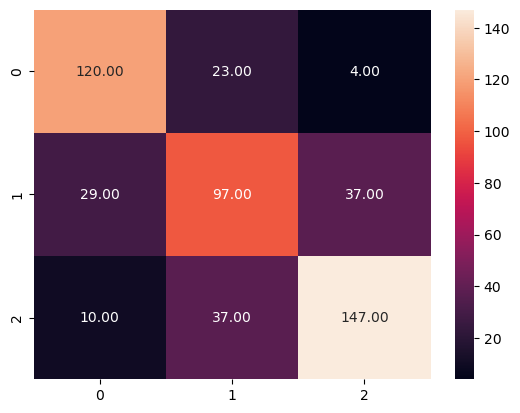

In [108]:
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True, fmt='.2f')

**feature importance in Random Forest**

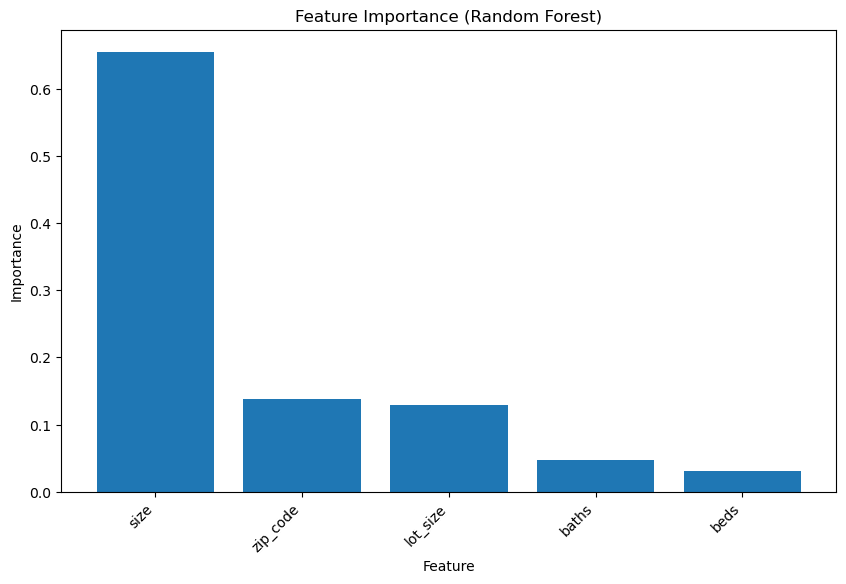

In [109]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are your training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Get feature names (assuming X_train is a pandas DataFrame)
feature_names = X_train.columns

# Sort features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=45, ha='right')  # Adjust rotation for better readability
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


# **Support Vector Machine**

In [110]:
X_train = train_data.iloc[:2007, :-1]
y_train = train_data['price_category']

In [111]:
X_test = test_data.iloc[:2007, :-1]
y_test = test_data['price_category']  # Removed the dot after test_data

In [112]:
svm_classifier =  svm.SVC(kernel='linear')

In [113]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [114]:
y_pred = svm_classifier.predict(X_test)

In [115]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_accuracy

0.32142857142857145

In [116]:
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Create a table to display the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Accuracy', 'F1 Score', 'Recall'],
    'Value': [precision, accuracy, f1, recall]
})

# Display the metrics table
print(metrics_table)

      Metric     Value
0  Precision  0.473137
1   Accuracy  0.321429
2   F1 Score  0.163720
3     Recall  0.321429


C:\Users\Iqra Iqbal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Task 4: Combined Analysis**

In [117]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [118]:
X_train = train_data.iloc[:2007, :-1]
y_train = train_data['price_category']

In [119]:
X_test = test_data.iloc[:2007, :-1]
y_test = test_data['price_category']  # Removed the dot after test_data

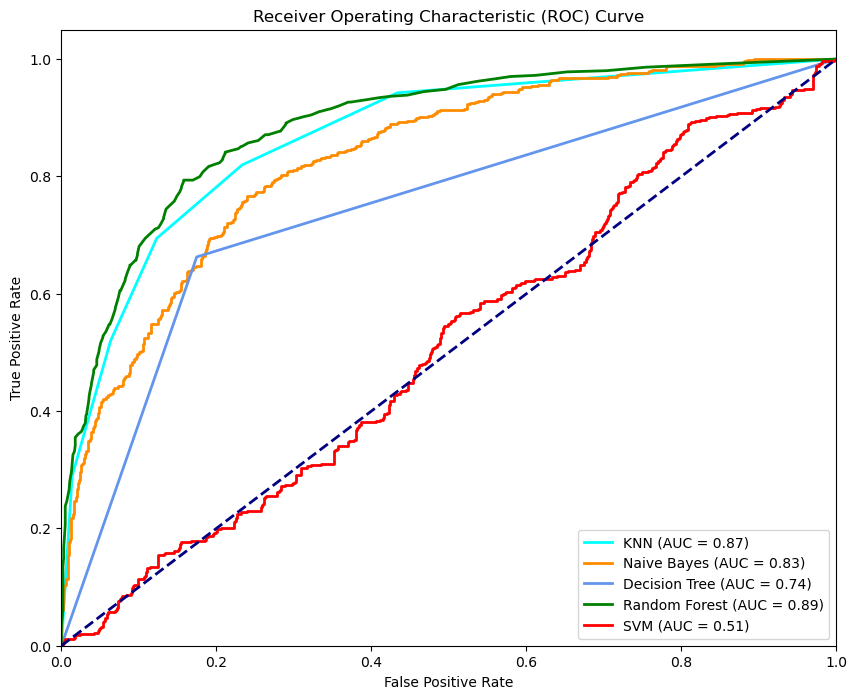

In [120]:
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))  # Assuming classes are the same for train and test

n_classes = y_train_bin.shape[1]

# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM':  svm.SVC(kernel='linear', probability=True)   # Add probability=True for SVC to enable predict_proba
}

# Set up plot details
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']  # Added 'red' for SVM
lw = 2

# Iterate over classifiers
for (name, clf), color in zip(classifiers.items(), colors):
    classifier = OneVsRestClassifier(clf)
    y_score = classifier.fit(X_train, y_train_bin).predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.plot(fpr["micro"], tpr["micro"], color=color, lw=lw, label=f'{name} (AUC = {roc_auc["micro"]:.2f})')

# Plot details
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()